In [1]:
#import modules
import os
import datetime
from pathlib import Path
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
path = Path(r'/Users/sr2/OneDrive - University College London/PhD/Research/'
        'Missions/SWARM/Non-Flight Data/Analysis/Apr-22/data/LSTM/')

file_name = str(path) + '/LSTM_37-feats.csv'
df = pd.read_csv(file_name)
#df

In [3]:
#Address tails

#df[df['te_max'] > 5000] = 5000

Split and normalise the data

In [4]:
#split
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

print ('\n'.join([
    f'Train set size: {len(train_df)}',
    f'Val set size: {len(val_df)}',
    f'Test set size: {len(test_df)}',
    ]))

num_features = df.shape[1]

#norm
train_mean = train_df.mean()
train_std = train_df.std()

#Must always use train_mean & train_std so model cannot see any of these vals
train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std


Train set size: 1811
Val set size: 518
Test set size: 259


Visualise the distribution

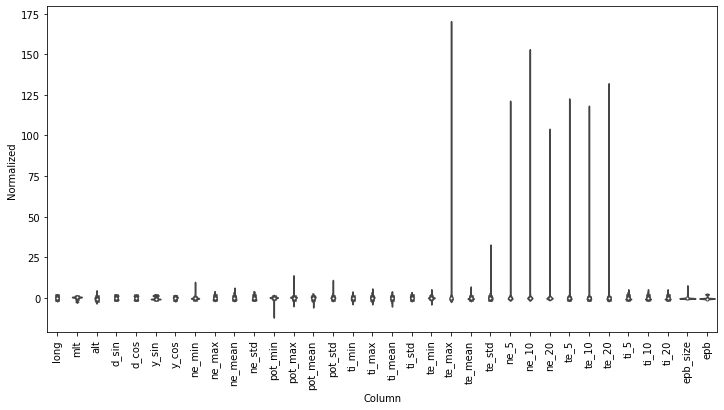

In [5]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

<AxesSubplot:xlabel='te_min', ylabel='te_max'>

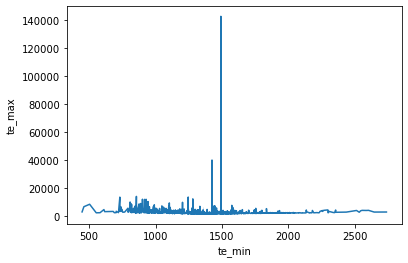

In [6]:
sns.lineplot(data = df, x='te_min', y='te_max')

In [7]:
feature_to_guess = 'epb'